# ITS summer research project
In this project I have looked at a dataset containing n = 65 responses. It is part of the first roundt of workshops around schools in Norway. 

### Dependencies and installations
To run this notebook, you need to install the following dependencies:

1. **Pandas**: For data manipulation and analysis.
2. **NumPy**: For numerical operations.
3. **Matplotlib**: For data visualization.
4. **Seaborn**: For statistical data visualization.
5. **WordCloud**: For generating word clouds

In [1]:
#%pip install pandas numpy matplotlib seaborn wordcloud

In [2]:
# Suppress notebook warnings
import warnings
import pandas as pd

# Suppress specific warning from openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

pd.set_option('display.max_columns', None)  # Adjust to display all columns
pd.set_option('display.width', 1000)  # Adjust the width to fit your screen

figures = "figures/"

In [3]:
from data_processing import read_nettskjema_file, get_geo
import matplotlib.pyplot as plt
from data_visualization import word_cloud, bag_of_words, geo_plot, box_plot, barh_chart, donut_plot, survey, stack_barh, add_title, stacked_barh

## Dataset
Give a description of: 
 - Where the dataset is gathered from
 - What the  dataset contains and its format
 - Describe the type of preprocessing done to the dataset
 - Describe the valuetypes and considerations on modelling

In [4]:
# TODO: add code to get the dataset
data = read_nettskjema_file(["res-engelsk.xlsx","res-norsk.xlsx"])

### Optional - visualize the whole dataset
Give an overview of the whole dataset and describe in more detail the layout if needed.

## Questions
Give an overview of the questionnaire and the full text for each question including its answer-type. Consider relating this to the dataset to show the format at which these values are stored in the dataset.

#### Q1: What are the three most important things to consider when installing renewable energy?
This is an open ended question with free text input. The students where asked to rank the priorities from 1. to 3. through text. The values are considered unstructured text-data and need to be cleaned before visualizing. 

As a simple visualization we have drawn a word-cloud showing the most frequent words by the respondents. 

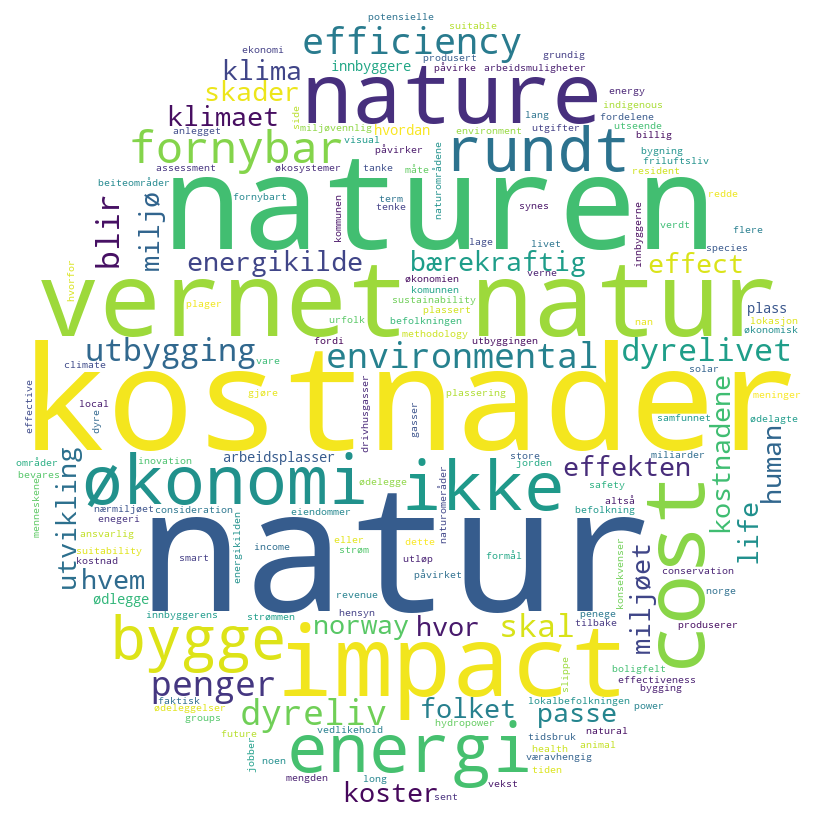

pandas.core.frame.DataFrame

In [5]:
# TODO: Create a round format aswell (send it today)
word_cloud(data["opinions"].dropna(axis=0), "sub")
type(data["opinions"])

In [6]:
from data_visualization import text_pre
from collections import Counter
import re

text = text_pre(data["opinions"].dropna(axis=0), "sub")

# Tokenize the text into words
words = re.findall(r'\b\w+\b', text)

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display the top 10 words
for word, count in top_10_words:
    print(f'{word}: {count}')

natur: 20
kostnader: 11
naturen: 9
vernet: 8
impact: 7
cost: 5
nature: 5
energi: 5
økonomi: 5
ikke: 5


#### Q2: Which renewable energy source would you choose?
This question contains two discrimative choices in a series of five questions. Only at most three questions are shown to the student, depending on their choice of answer. The selection of questions shown to the student depends on: 
1. The first question selects between onshore and offshore wind-production. This dictates the prefered wind-placement for the student. 
2. If onshore is chosen the student has to select between small and large scale windturbines. This dictates the size of the windmills. 
3. The final question gives the student the option to include solar as well as windproduction.

All values are stored as binary. They form a discrete distribution showing the relation between offshore, onshore and a combination with solar. 

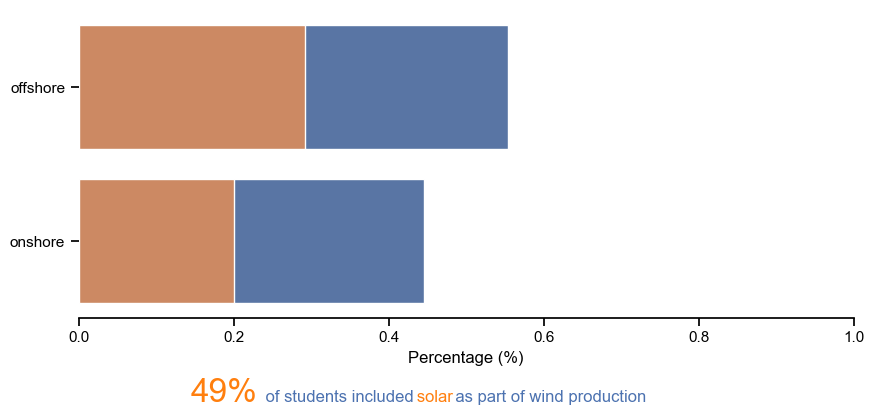

In [7]:
fig = stack_barh(data["energySource"][["offshore", "onshore", "solar"]])
#add_title(fig, "Proportion of solar with offshore and onshore")

#### Q3: Which Norwegian county do you think are most appropriate for wind turbines?
This question lets the student choose the municipalities that they feel are appropriate for wind turbines. They can choose multiple places and each municipality can either be choosen or left unchecked. 

In the dataset the values are stored as binary. They create a discrete distribution over each municipality. 

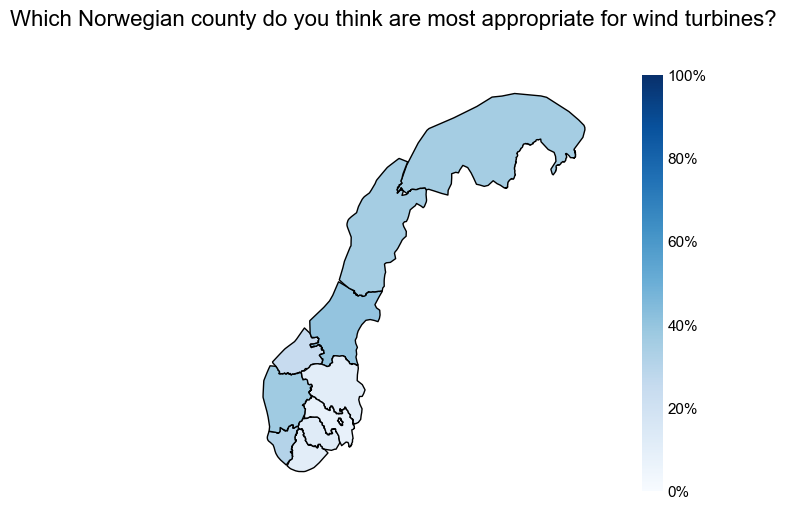

,samiskforvaltningsomrade,oppdateringsdato,fylkesnummer,navn,geometry,area,neg,pos
0,false,20190301000000,42,"[ { ""navn"": ""Agder"", ""objtype"": ""Administrativ...","POLYGON ((735283.184 8090351.253, 735790.807 8...",8.396328e+10,0.892308,0.107692
1,false,20200207000000,03,"[ { ""navn"": ""Oslo"", ""objtype"": ""AdministrativE...","POLYGON ((1167648.526 8403581.613, 1167720.319...",1.897687e+09,0.969231,0.030769
2,JA,20200207000000,54,"[ { ""navn"": ""Troms og Finnmark"", ""objtype"": ""A...","POLYGON ((2279793.396 11301684.786, 2043769.12...",9.784271e+11,0.646154,0.353846
3,false,20200207000000,15,"[ { ""navn"": ""MÃ¸re og Romsdal"", ""objtype"": ""Ad...","POLYGON ((544062.831 8962609.056, 581658.62 89...",1.203636e+11,0.753846,0.246154
4,false,20190913000000,38,"[ { ""navn"": ""Vestfold og Telemark"", ""objtype"":...","POLYGON ((842778.831 8264540.496, 843684.59 82...",7.613962e+10,0.876923,0.123077
5,JA,20200207000000,50,"[ { ""navn"": ""TrÃ¸ndelag"", ""objtype"": ""Administ...","POLYGON ((1038081.119 9490124.736, 908285.553 ...",3.052547e+11,0.600000,0.400000
6,false,20200207000000,11,"[ { ""navn"": ""Rogaland"", ""objtype"": ""Administra...","POLYGON ((504414.836 8277042.982, 498174.242 8...",6.231276e+10,0.692308,0.307692
7,false,20190225000000,34,"[ { ""navn"": ""Innlandet"", ""objtype"": ""Administr...","POLYGON ((891304.201 8679974.05, 894049.663 86...",2.273593e+11,0.892308,0.107692
8,false,20190225000000,30,"[ { ""navn"": ""Viken"", ""objtype"": ""Administrativ...","POLYGON ((993043.302 8424580.499, 995810.707 8...",1.019396e+11,0.923077,0.076923
9,JA,20211115000000,18,"[ { ""navn"": ""Nordland"", ""objtype"": ""Administra...","POLYGON ((1334467.27 10382465.925, 1301238.844...",5.326345e+11,0.646154,0.353846


In [8]:
# TODO: combine both the figures into one
com = get_geo(data["windMun"])
fig, ax = plt.subplots(1,1, figsize = (8,6))
geo_plot(com, fig, ax)
add_title(fig, "Which Norwegian county do you think are most appropriate for wind turbines?")
com

#### Q4: To what extent you agree or disagree to install wind turbines here?
This question lets the student rank a picture from a scale of 1 to 9. In total there are 9 different locations that are visualized. 

In the dataset the values are stored as discrete integers ranging from 1 to 9 for each question. 

c:\Users\nikoo\OneDrive - Universitetet i Oslo\V24\Sommerjobb UiO\Data_analyse\data_visualization.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


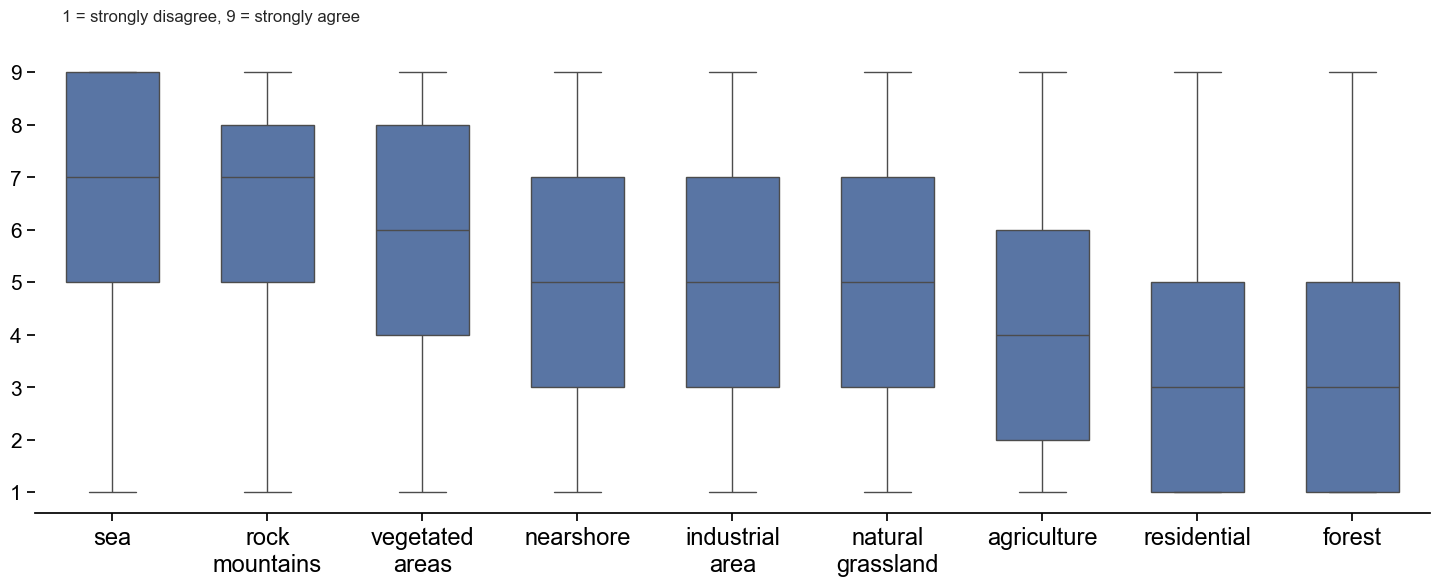

In [9]:
# TODO: Change the name to: sea, rock mountains, vegetated areas, nearshore, Industrial area, natural grasslands, agriculture, residential, forest
# TODO: Remove x, y labels. Remove title, add subtitle as 1 = disagree, 9 = agree

rename_dict = {"ocean": "sea", "rock" : "rock mountains", "hill" : "vegetated areas", "coast" : "nearshore", "industry" : "industrial area", "grass" : "natural grassland", "housing" : "residential"}
df = data["windVisual"].rename(columns = rename_dict)
ax = box_plot(df)
#add_title(ax.figure,"","1 = strongly disagree, 9 = strongly agree")

ax.figure.text(0.14, 0.95, "1 = strongly disagree, 9 = strongly agree", ha='left', va='top', fontsize=12)

plt.savefig(figures + 'landscapes_visual.png', dpi=300, bbox_inches='tight')

#### Q5: To what extent do you agree or disagree with placing wind turbines in the following areas?
This questions is ranked from 1 to 5. In total there are seven questions that define different considerations to take when placing or building renewable energy. 

In the dataset the values are stored as discrete integeres ranging from 1 to 5 for each question. 

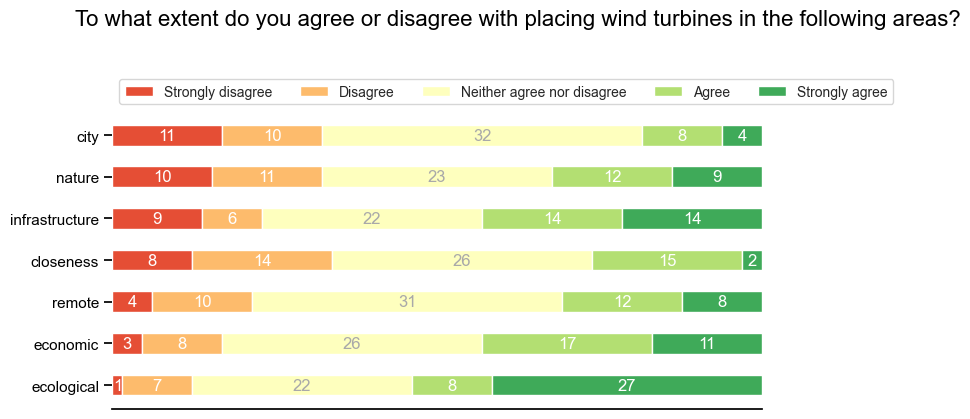

In [10]:
fig, ax = survey(data["windConsideration"])
add_title(fig, "To what extent do you agree or disagree with placing wind turbines in the following areas?")


#### Q6: Which Norwegian county do you think are most appropriate for solar energy?
This question lets the student choose the municipalities that they feel are appropriate for solar turbines. They can choose multiple places and each municipality can either be choosen or left unchecked. 

In the dataset the values are stored as binary. They create a discrete distribution over each municipality. 

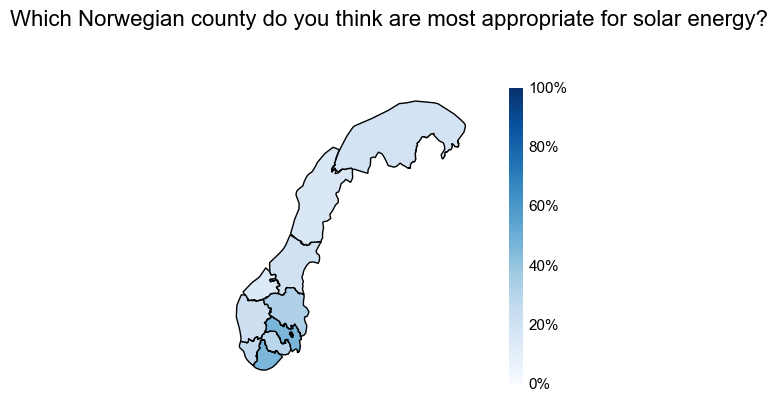

,samiskforvaltningsomrade,oppdateringsdato,fylkesnummer,navn,geometry,area,neg,pos
0,false,20190301000000,42,"[ { ""navn"": ""Agder"", ""objtype"": ""Administrativ...","POLYGON ((735283.184 8090351.253, 735790.807 8...",8.396328e+10,0.538462,0.461538
1,false,20200207000000,03,"[ { ""navn"": ""Oslo"", ""objtype"": ""AdministrativE...","POLYGON ((1167648.526 8403581.613, 1167720.319...",1.897687e+09,0.584615,0.415385
2,JA,20200207000000,54,"[ { ""navn"": ""Troms og Finnmark"", ""objtype"": ""A...","POLYGON ((2279793.396 11301684.786, 2043769.12...",9.784271e+11,0.815385,0.184615
3,false,20200207000000,15,"[ { ""navn"": ""MÃ¸re og Romsdal"", ""objtype"": ""Ad...","POLYGON ((544062.831 8962609.056, 581658.62 89...",1.203636e+11,0.861538,0.138462
4,false,20190913000000,38,"[ { ""navn"": ""Vestfold og Telemark"", ""objtype"":...","POLYGON ((842778.831 8264540.496, 843684.59 82...",7.613962e+10,0.707692,0.292308
5,JA,20200207000000,50,"[ { ""navn"": ""TrÃ¸ndelag"", ""objtype"": ""Administ...","POLYGON ((1038081.119 9490124.736, 908285.553 ...",3.052547e+11,0.800000,0.200000
6,false,20200207000000,11,"[ { ""navn"": ""Rogaland"", ""objtype"": ""Administra...","POLYGON ((504414.836 8277042.982, 498174.242 8...",6.231276e+10,0.738462,0.261538
7,false,20190225000000,34,"[ { ""navn"": ""Innlandet"", ""objtype"": ""Administr...","POLYGON ((891304.201 8679974.05, 894049.663 86...",2.273593e+11,0.676923,0.323077
8,false,20190225000000,30,"[ { ""navn"": ""Viken"", ""objtype"": ""Administrativ...","POLYGON ((993043.302 8424580.499, 995810.707 8...",1.019396e+11,0.538462,0.461538
9,JA,20211115000000,18,"[ { ""navn"": ""Nordland"", ""objtype"": ""Administra...","POLYGON ((1334467.27 10382465.925, 1301238.844...",5.326345e+11,0.846154,0.153846


In [11]:
com = get_geo(data["sunPower"])
fig, ax = plt.subplots()
geo_plot(com, fig, ax)
add_title(fig, "Which Norwegian county do you think are most appropriate for solar energy?")
com

#### Q7: What do you find the most important to think about when producing electricity?
This question is a multiple choice question with four different considerations to take for renewable energy production. 

In the dataset each answerfield is a separate column with a binary choice.

                                              0
Response                                       
Zero carbon emissions                  0.569231
Producing self-sufficient electricity  0.600000
Keep the cost of electricity low       0.523077
Protect nature, animals, and birds     0.538462


Response
pollution     37
capacity      39
cost          34
ecological    35
dtype: int64

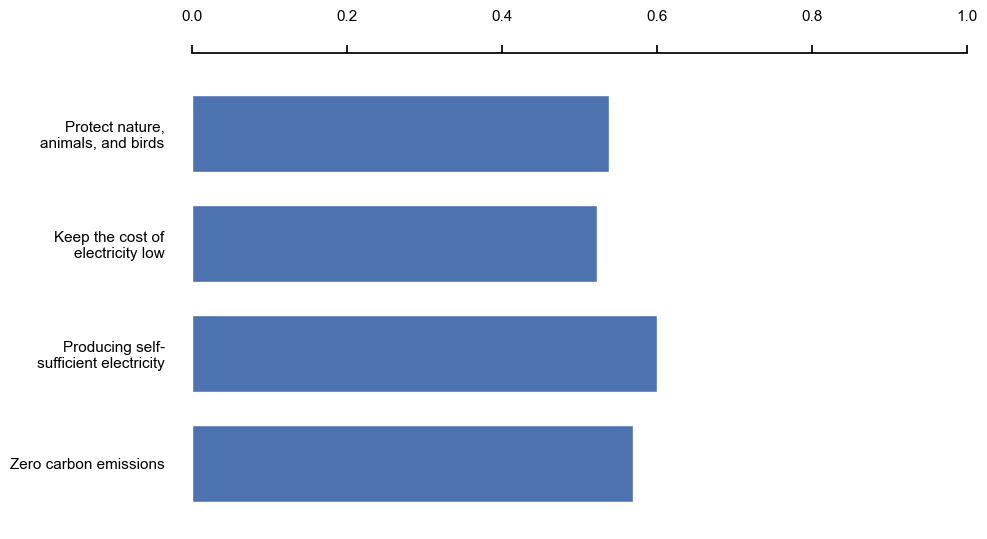

In [12]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlim(0, 1)
df = data["electricProd"].aggregate(lambda x: (x.sum() / data["electricProd"].shape[0])).to_frame().reset_index()
rename_dict = {"pollution" : "Zero carbon emissions", "ecological" : "Protect nature, animals, and birds", "cost" : "Keep the cost of electricity low", "capacity" : "Producing self-sufficient electricity"}
df["Response"].replace(rename_dict, inplace=True)
df.set_index("Response", inplace=True)
barh_chart(df, fig, ax)
#add_title(fig, "What do you find the most important to think about when producing electricity?", "                     Each answer in percentage")
print(df)
data["electricProd"].sum()

#### Q8: What do you think is the best way to deal with this [renewable energy] variation?
This question asks the student to find a good solution to deal with variability in renewable energy solution. It gives the student for choices where only one can be chosen. 

In the dataset this is stored as labelled values forming a discrete set. 

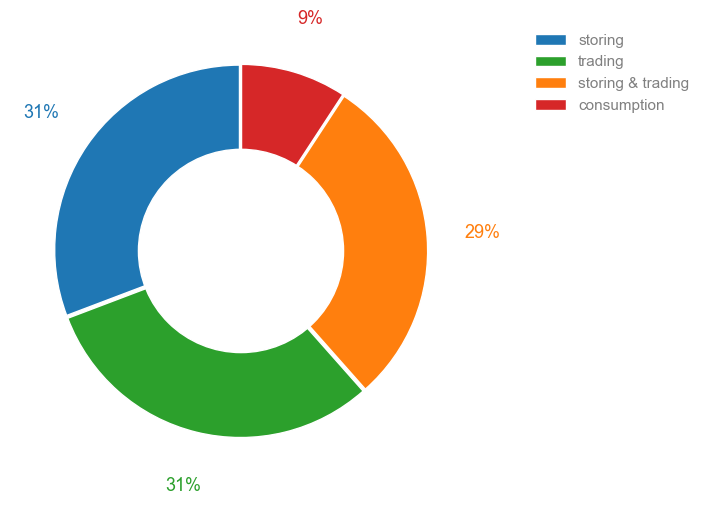

In [13]:
# TODO: Add code to visualize the question
fig, ax = plt.subplots(figsize = (8,6))
df = data["renewableVariance"].groupby('sub')['sub'].count().sort_values(ascending = False)
rename_dict = {"storing" : "storing", "trading" : "trading", "exporting" : "storing & trading", "conusmption" : "demand response"}
df.rename(index = rename_dict, inplace = True)
donut_plot(df, fig, ax)
#add_title(fig, "What do you think is the best way to deal\n with this [renewable energy] variation?")

#### Q9: What do you think about the country's [Norway] future energy supply?
This question lets the student predict the countries future import of electricity. The question has three choices.

In the dataset the values are labelled showing the choice each student made.

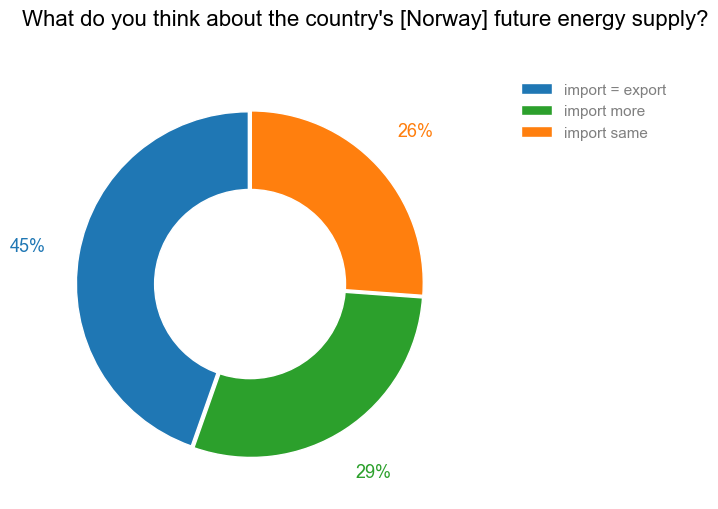

In [14]:
# TODO: Add code to visualize the question
fig, ax = plt.subplots(figsize = (8,6))
df = data["importOutlook"].groupby('sub')['sub'].count().sort_values(ascending = False)
rename_dict = {"balanced" : "import = export", "more" : "import more", "same" : "import same"}
df.rename(index = rename_dict, inplace = True)
donut_plot(df, fig, ax)
add_title(fig, "What do you think about the country's [Norway] future energy supply?")

#### Q10: Which option [Transmission line] do you prefer?
This questions gives three options to place transmission. Only one can be chosen forming a discrete set. 

In the dataset the values are stored as labels. Each label represents the option the student choosed. 

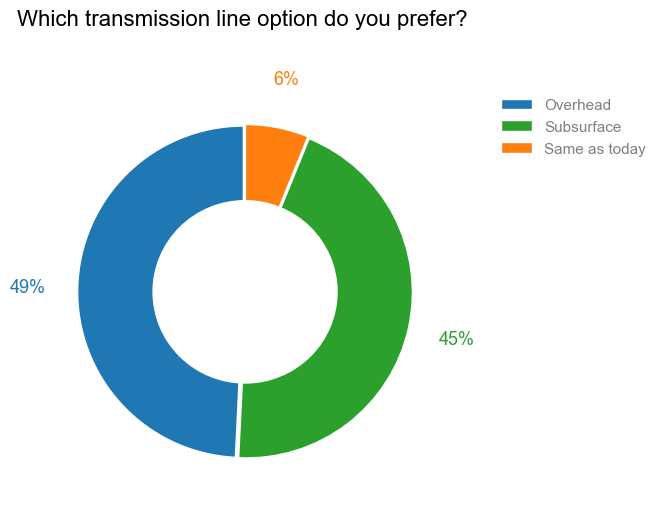

In [15]:
# TODO: Add code to visualize the question
fig, ax = plt.subplots(figsize = (8,6))
df = data["powerLine"].groupby('sub')['sub'].count().sort_values(ascending = False)
rename_dict = {"overground" : "Overhead", "underground" : "Subsurface", "nothing" : "Same as today"}
df.rename(index = rename_dict, inplace = True)
donut_plot(df, fig, ax)
add_title(fig, "Which transmission line option do you prefer?")

### Combined Country

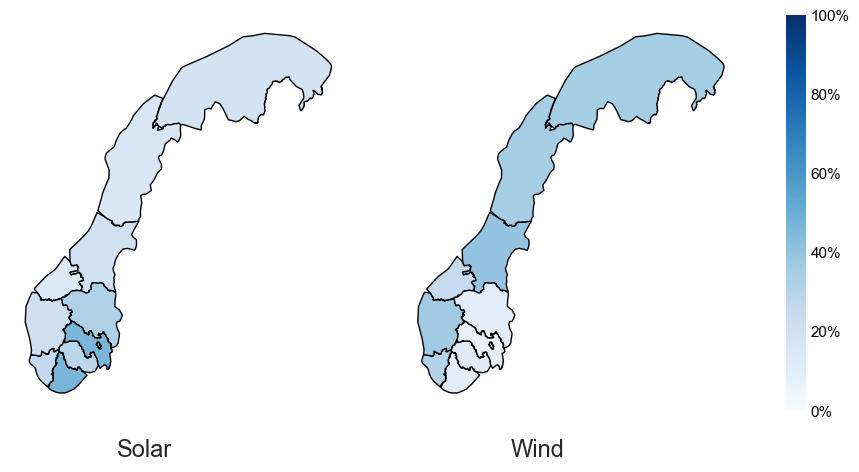

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))  # Adjust the figsize as needed

com = get_geo(data["sunPower"])
geo_plot(com, fig, ax[0], legend = False)
ax[0].text(0.4, -0.1, 'Solar', ha='center', va='center', transform=ax[0].transAxes, fontsize = 17)

com = get_geo(data["windMun"])
geo_plot(com, fig, ax[1])
ax[1].text(0.4, -0.1, 'Wind', ha='center', va='center', transform=ax[1].transAxes, fontsize = 17)

# Adjust the whitespace between the subplots
plt.subplots_adjust(wspace=-0.7)  # Adjust the value as needed
plt.savefig(figures + 'landscape_solar_wind.png', dpi=300, bbox_inches='tight')



## School overview
Write about the different locations where we performed our Questionaire. To see if the students have some different biases based on their locations we are interested in looking at the differences between the schools

#### Q2: Which renewable energy source would you choose?
This question contains two discrimative choices in a series of five questions. Only at most three questions are shown to the student, depending on their choice of answer. The selection of questions shown to the student depends on: 
1. The first question selects between onshore and offshore wind-production. This dictates the prefered wind-placement for the student. 
2. If onshore is chosen the student has to select between small and large scale windturbines. This dictates the size of the windmills. 
3. The final question gives the student the option to include solar as well as windproduction.

All values are stored as binary. They form a discrete distribution showing the relation between offshore, onshore and a combination with solar. 

<Figure size 1000x600 with 0 Axes>

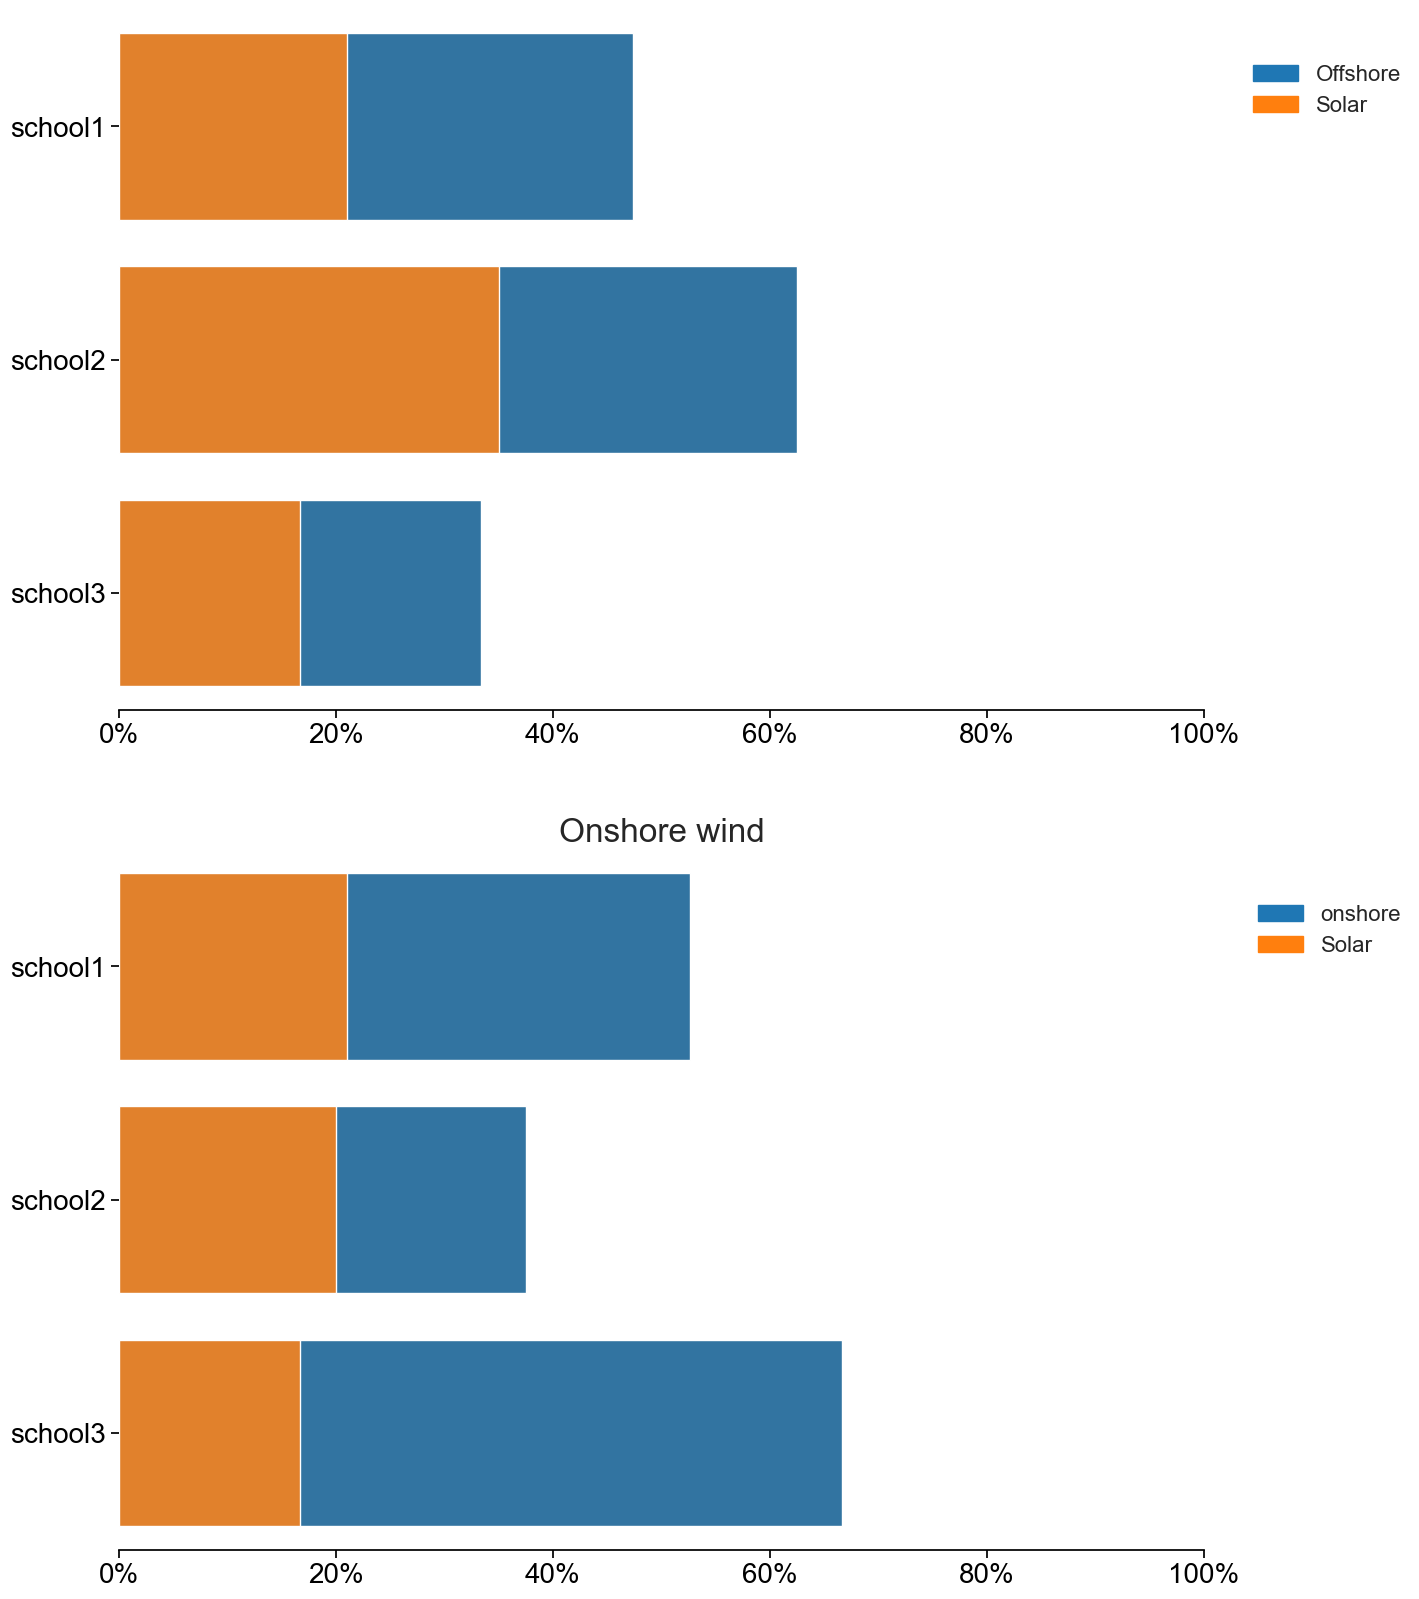

In [201]:
# TODO: combine offshore per school in one graph (grouped stacked graph), copy the colours from Shahzad
# TODO: create three figures in one plot; 1) offshore per school 2) onshore per school 3) solar between the groups and per school
import seaborn as sns
from matplotlib.patches import Patch

df = data[[ "date", "energySource"]]

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]
df.columns = [col[1] for col in df.columns]

"""
for school in new_values:
    fig = stack_barh(df[df["sub"] ==school][["offshore", "onshore", "solar"]])
    add_title(fig, f"Proportion of solar with offshore and onshore for {school}")
"""

# Group by 'sub' and calculate the mean for 'offshore'
df_grouped = df.groupby('sub')['offshore'].mean().reset_index()

df_grouped_solar = df[df["offshore"] == 1].groupby('sub')['solar'].mean().reset_index()
df_merged = pd.merge(df_grouped, df_grouped_solar, on='sub', suffixes=('_offshore', '_solar'))
df_merged['result'] = df_merged['offshore'] * df_merged['solar']


# Create the bar plot
plt.figure(figsize=(10, 6))

offshore_color = '#1f77b4'  # Replace with the actual color used by Shahzad for offshore
solar_color = '#ff7f0e'     # Replace with the actual color used by Shahzad for solar

fig, axes = plt.subplots(2, 1, figsize=(14, 20))

sns.barplot(x='offshore', y='sub', data=df_grouped, orient = "h", color = offshore_color, ax = axes[0])
sns.barplot(x='result', y='sub', data=df_merged, orient = "h", color = solar_color, ax = axes[0])

# Add titles and labels to the first axes
axes[1].set_title('For onshore wind', fontsize=24)
axes[0].set_xlabel('', fontsize=14)
axes[0].set_ylabel('', fontsize=14)
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[0].set_xlim(0, 1)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))

# Create custom legend handles
legend_handles = [
    Patch(color=offshore_color, label='Offshore'),
    Patch(color=solar_color, label='Solar')
]

# Add the legend to the plot
axes[0].legend(handles=legend_handles, fontsize=16, frameon=False, bbox_to_anchor=(1.2, 0.95))

# Group by 'sub' and calculate the mean for 'offshore'
df_grouped = df.groupby('sub')['onshore'].mean().reset_index()

df_grouped_solar = df[df["onshore"] == 1].groupby('sub')['solar'].mean().reset_index()
df_merged = pd.merge(df_grouped, df_grouped_solar, on='sub', suffixes=('_onshore', '_solar'))
df_merged['result'] = df_merged['onshore'] * df_merged['solar']

onshore_color = '#1f77b4'  # A lighter shade of blue for onshore
solar_color = '#ff7f0e'  # A darker shade of orange for solar

sns.barplot(x='onshore', y='sub', data=df_grouped, orient = "h", color = onshore_color, ax = axes[1])
sns.barplot(x='result', y='sub', data=df_merged, orient = "h", color = solar_color, ax = axes[1])

# Add titles and labels to the first axes
axes[1].set_title('For onshore wind', fontsize=24)
axes[1].set_xlabel('', fontsize=14)
axes[1].set_ylabel('', fontsize=14)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[1].set_xlim(0, 1)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))

# Create custom legend handles
legend_handles = [
    Patch(color=onshore_color, label='Onshore'),
    Patch(color=solar_color, label='Solar')
]

# Add the legend to the plot
axes[1].legend(handles=legend_handles, fontsize=16, frameon=False, bbox_to_anchor=(1.2, 0.95))


#### Q4: To what extent you agree or disagree to install wind turbines here?
This question lets the student rank a picture from a scale of 1 to 9. In total there are 9 different locations that are visualized. 

In the dataset the values are stored as discrete integers ranging from 1 to 9 for each question. 

In [73]:
rename_dict = {"ocean": "sea", "rock" : "rock mountains", "hill" : "vegetated areas", "coast" : "nearshore", "industry" : "industrial area", "grass" : "natural grassland", "housing" : "residential"}
df = data["windVisual"].rename(columns = rename_dict)
sorted_columns = df.mean().sort_values(ascending = False).index
df = pd.melt(df[sorted_columns])

#ax = box_plot(df)
df_ordered = df.groupby("Response").mean().reset_index().sort_values(by = "value", ascending=False)
df_top3 = df_ordered["Response"].iloc[0:3].unique()
df_bottom3 = df_ordered["Response"].iloc[-3:].unique()

array(['agriculture', 'residential', 'forest'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nikoo\AppData\Local\Temp\ipykernel_28104\2746102895.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels)


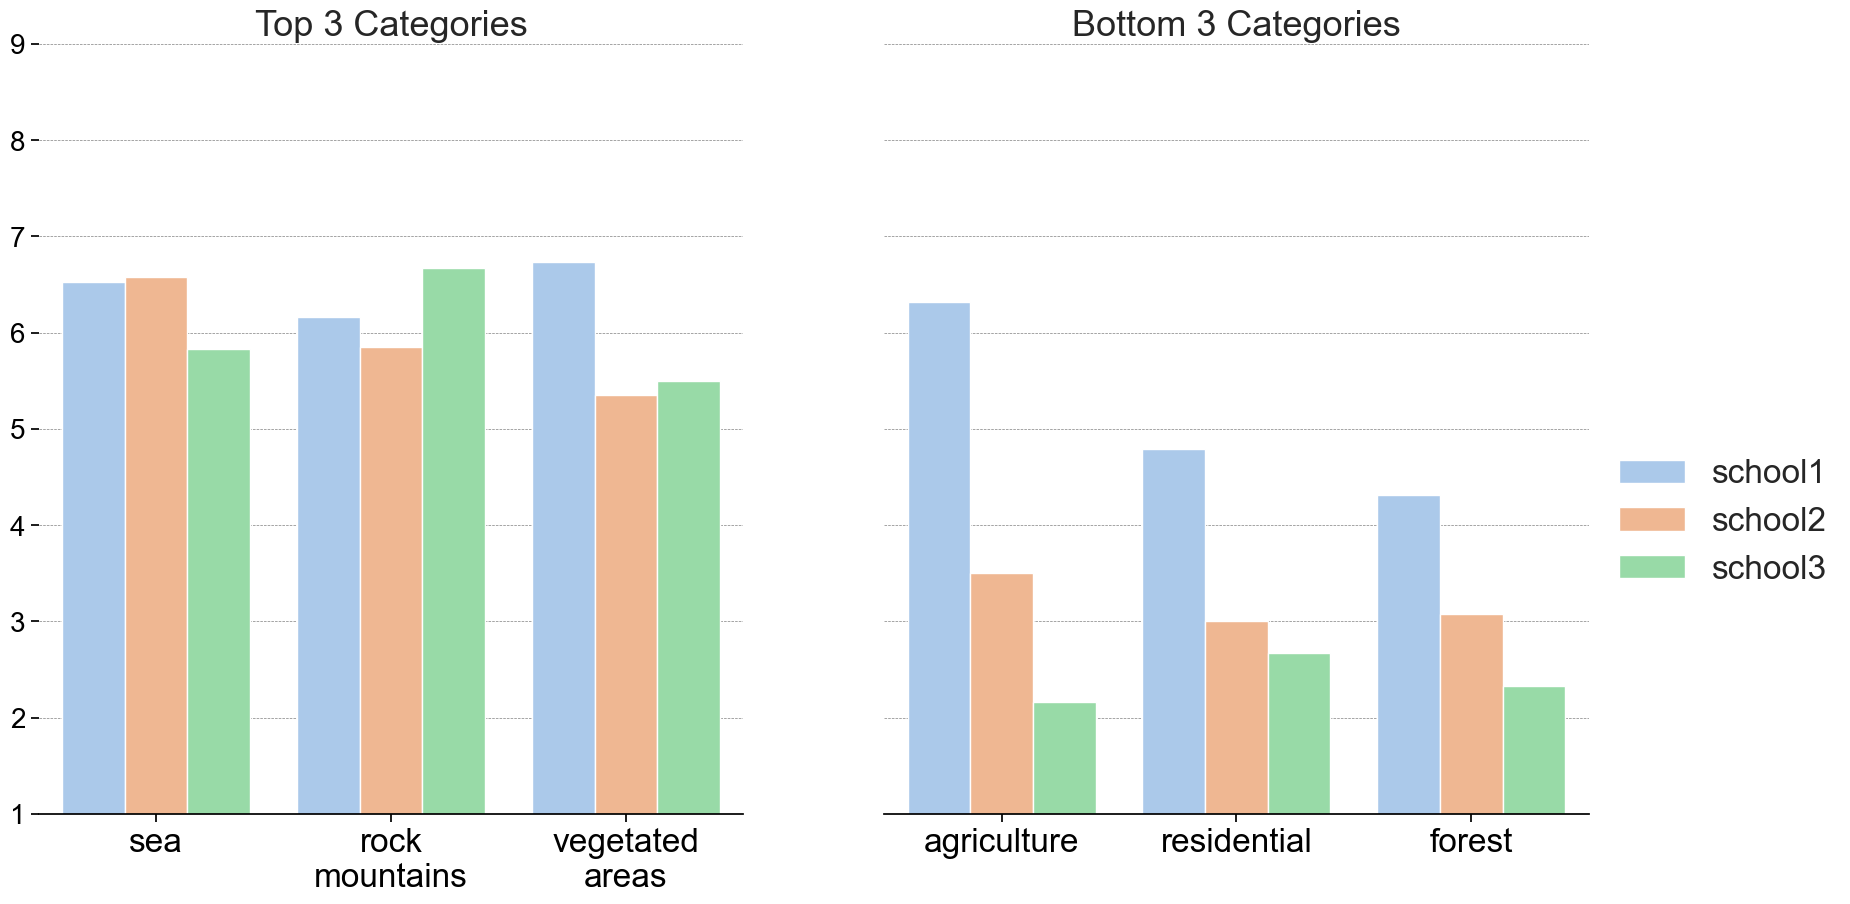

In [121]:

# TODO: select only housing, agriculture and forest since that is where the students in total disagree (why did they disagree)
#TODO: select rock, ocean and hill for the agreed part. Copy the format of the todo above
# TODO: three most preferred, and three less preferred

import seaborn as sns
rename_dict = {"ocean": "sea", "rock" : "rock mountains", "hill" : "vegetated areas", "coast" : "nearshore", "industry" : "industrial area", "grass" : "natural grassland", "housing" : "residential"}
df = data[[ "date", "windVisual"]]

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]

df.columns = [col[1] for col in df.columns]

df = pd.melt(df, id_vars=['sub'], var_name='Category', value_name='Value')
df = df.groupby(["sub", "Category"])["Value"].mean().reset_index()

df["Category"].replace(rename_dict, inplace = True)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x="Category", y="Value", hue="sub", data=df, palette='pastel', ax=axes[0], order=df_top3, legend=False)
axes[0].set_title('Top 3 Categories', fontsize=26)
axes[0].set_ylim(1, 9)
axes[0].set_xlabel('', fontsize=19)
axes[0].set_ylabel('', fontsize=19)
axes[0].legend(title='', bbox_to_anchor=(1, 0.8), loc='upper left', frameon=False, fontsize=12)
axes[0].tick_params(axis='x', labelsize=24)
axes[0].tick_params(axis='y', labelsize=20)

# Plot bottom categories on the second subplot
sns.barplot(x="Category", y="Value", hue="sub", data=df, palette='pastel', ax=axes[1], order=df_bottom3)
axes[1].set_title('Bottom 3 Categories', fontsize=26)
axes[1].set_ylim(1, 9)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].legend(title='', bbox_to_anchor=(1, 0.5), loc='upper left', frameon=False, fontsize=24)
axes[1].tick_params(axis='x', labelsize=24)
axes[1].tick_params(axis='y', labelsize=20, left=False, labelleft = False)  # Remove yticks

# Add horizontal lines at each y-tick position
for ytick in axes[1].get_yticks():
    axes[1].axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5, zorder = 0)

for ytick in axes[0].get_yticks():
  axes[0].axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5, zorder = 0)

labels = [label.get_text().replace(' ', '\n') for label in axes[0].get_xticklabels()]
axes[0].set_xticklabels(labels)

plt.savefig(figures + 'grouped_wind_visual_landscape.png', dpi=300, bbox_inches='tight')

# Sort the grouped DataFrame by 'Value' in descending order

#### Q3 & Q6: Which Norwegian county do you think are most appropriate for wind & solar energy?
This question lets the student choose the municipalities that they feel are appropriate for windmills and solar panels. They can choose multiple places and each municipality can either be choosen or left unchecked. 

In the dataset the values are stored as binary. They create a discrete distribution over each municipality. 

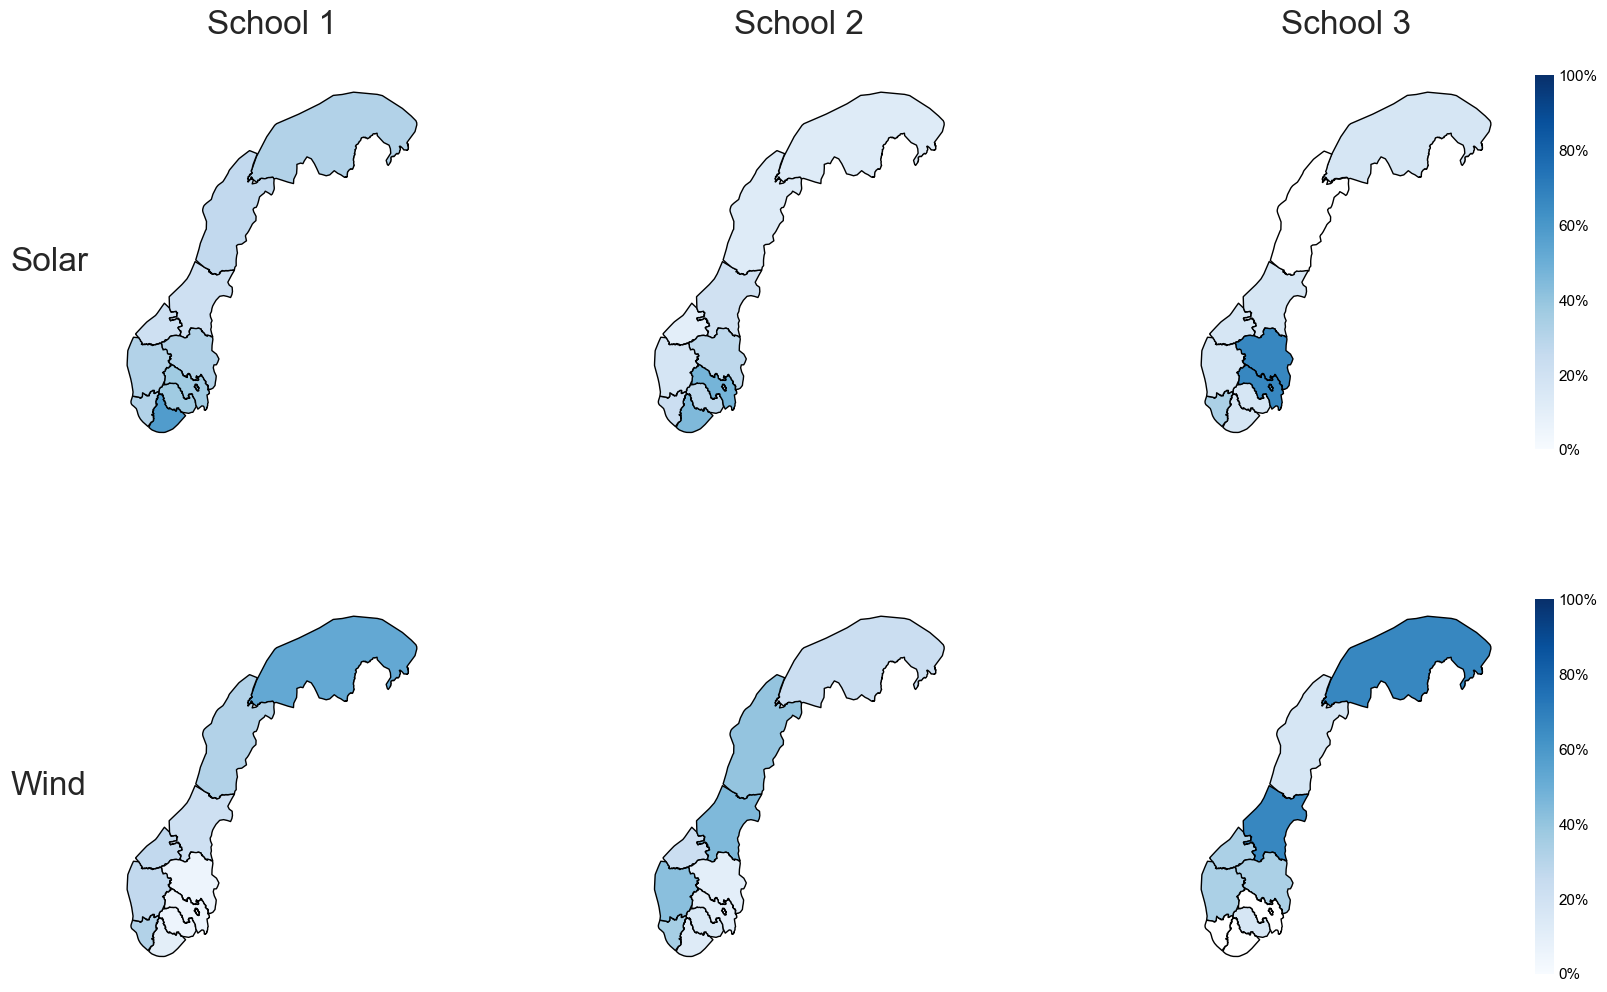

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fontsize = 24

# Sun power data
com = get_geo(data["sunPower"])
df = data[["date", "sunPower"]]
old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]
[df[('date', 'sub')].replace(old, new, inplace=True) for old, new in zip(old_values, new_values)]
df.columns = [col[1] for col in df.columns]

schools = ["school1", "school2", "school3"]
for i, school in enumerate(schools):
    school_df = df[df["sub"] == school]
    com = get_geo(school_df.iloc[:, 1:])
    if i == (len(schools) - 1):
        geo_plot(com, fig, ax[0][i], legend=True)
    else:
        geo_plot(com, fig, ax[0][i], legend=False)
    ax[0][i].set_title(f"{school[0].upper()}{school[1:-1]} {school[-1]}", pad=30, fontsize=fontsize)

# Wind data
com = get_geo(data["windMun"])
df = data[["date", "windMun"]]
old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]
[df[('date', 'sub')].replace(old, new, inplace=True) for old, new in zip(old_values, new_values)]
df.columns = [col[1] for col in df.columns]

for i, school in enumerate(schools):
    school_df = df[df["sub"] == school]
    com = get_geo(school_df.iloc[:, 1:])
    if i == (len(schools) - 1):
        geo_plot(com, fig, ax[1][i], legend=True)
    else:
        geo_plot(com, fig, ax[1][i], legend=False)
    #ax[1][i].set_title(school, pad=30, fontsize=14)

# Adding row titles
ax[0][0].text(-0.2, 0.5, 'Solar', va='center', ha='center', rotation='horizontal', transform=ax[0][0].transAxes, fontsize=fontsize)
ax[1][0].text(-0.2, 0.5, 'Wind', va='center', ha='center', rotation='horizontal', transform=ax[1][0].transAxes, fontsize=fontsize)

# Adjust layout to add space between rows
plt.subplots_adjust(hspace=0.4)
plt.savefig(figures + 'landscapes_solar_wind.png', dpi=300, bbox_inches='tight')

plt.show()

#### Q9: What do you think about the country's [Norway] future energy supply?
This question lets the student predict the countries future import of electricity. The question has three choices.

In the dataset the values are labelled showing the choice each student made.

c:\Users\nikoo\OneDrive - Universitetet i Oslo\V24\Sommerjobb UiO\Data_analyse\data_visualization.py:523: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(custom_labels)


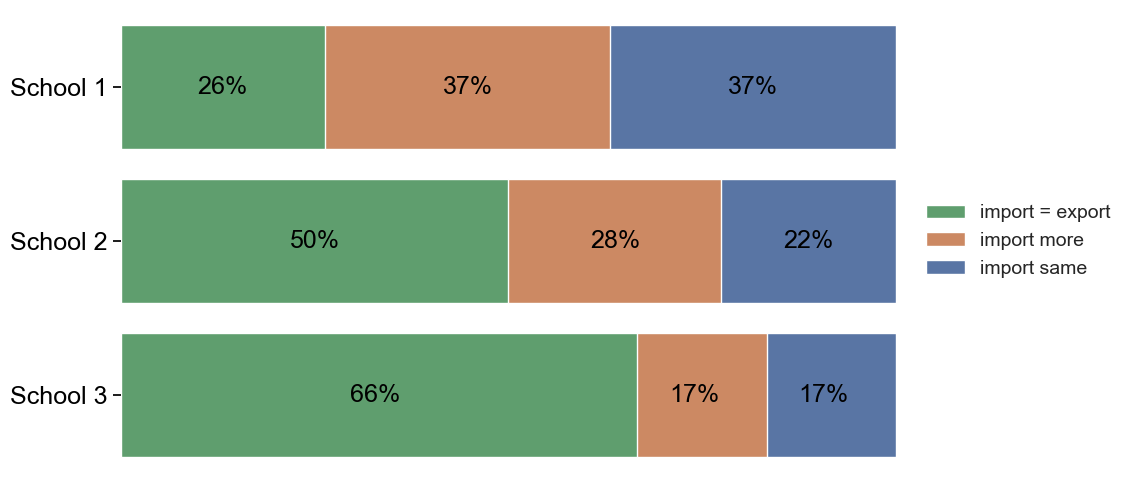

In [21]:
# TODO: copy Sharhzads format :)

import pandas as pd

column = "importOutlook"
df = data.drop(columns=[("opinions", "sub")]) # Drop values with non-linear values
df = df.groupby([("date", "sub"), (column, "sub")]).sum().reset_index()

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old, new, inplace=True) for old, new in zip(old_values, new_values)]
df_sum = df[[(column, c) for c in df[column].columns[1:]]].sum(axis=1)
df = df[[("date", "sub"), (column, "sub")]]
df.columns = [col[0] for col in df.columns]

df = pd.concat([df, df_sum], axis=1)
df.columns = ["SchoolGroup", "Category", "Count"]

rename_dict = {"balanced" : "import = export", "more" : "import more", "same" : "import same"}
df['Category'].replace(rename_dict, inplace=True)

fig, ax = stacked_barh(df, groups = "SchoolGroup", subgroups="Category")
plt.savefig(figures + 'energy_supply_schools.png', dpi=300, bbox_inches='tight')

#add_title(fig, "What do you think about Norways future energy supply?", "The answers are grouped per school")

#### Q10: Which option [Transmission line] do you prefer?
This questions gives three options to place transmission. Only one can be chosen forming a discrete set. 

In the dataset the values are stored as labels. Each label represents the option the student choosed. 

c:\Users\nikoo\OneDrive - Universitetet i Oslo\V24\Sommerjobb UiO\Data_analyse\data_visualization.py:523: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(custom_labels)


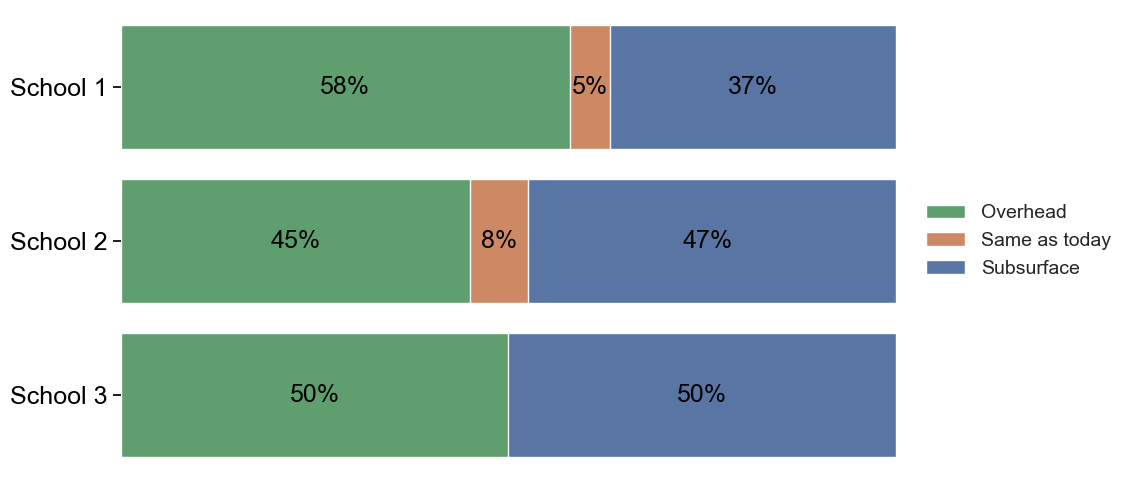

In [22]:
df = data.drop(columns = [("opinions", "sub")])
column = "powerLine"
df = df.groupby([("date","sub"), (column, "sub")]).sum().reset_index()

old_values = df[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]
df
df_sum = df[[(column,c) for c in df[column].columns[1:]]].sum(axis = 1)
df = df[[("date", "sub"), (column, "sub")]]
df.columns = [col[0] for col in df.columns]

df = pd.concat([df,df_sum], axis = 1)
df.columns = ["SchoolGroup", "Category", "Count"]

rename_dict = {"overground" : "Overhead", "underground" : "Subsurface", "nothing" : "Same as today"}
df["Category"].replace(rename_dict, inplace = True)

# Order the plot
# Define the desired order for the categories
category_order = ["Overhead", "Same as today", "Subsurface"]

# Convert the "Category" column to a categorical type with the specified order
df["Category"] = pd.Categorical(df["Category"], categories=category_order, ordered=True)

# Sort the DataFrame by the "Category" column to ensure the order is respected
df = df.sort_values(by=["SchoolGroup", "Category"])


fig, ax = stacked_barh(df, groups = "SchoolGroup", subgroups="Category")
plt.savefig(figures + 'transmission_lines_schools.png', dpi=300, bbox_inches='tight')

#add_title(fig, "Which Transmission line do you prefer?")
#sns.catplot(df, x = "SchoolGroup", y = "Count", hue = "Category", kind = "bar")